In [5]:
# imports

import re
import pickle
import os
import collections

from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')

In [6]:
df=pd.read_csv('preprocessed_data/news_data.csv',index_col=0)
df.index=pd.to_datetime(df.index,format="%Y-%m-%d")
df.sort_index(inplace=True)
# 코리아헤럴드만 제거됨 (영어)
df.dropna(inplace=True)

# column 순서 변경
df=df.loc[:,['news_brand','news_title_raw','news_title_cleaned','news_words']]

In [37]:
# mask
x, y = np.ogrid[:300, :400]
mask = (x - 150) ** 2 + 0.3*(y - 200) ** 2 > 100 ** 2
mask = 255 * mask.astype(int)

In [ ]:
tags = df['news_brand'].value_counts().to_dict()

In [8]:
# date slicing
show_year = [2021]
show_month = [1,2,3]
temp_df=df[(df.index.year.isin(show_year)) & (df.index.month.isin(show_month))]

In [ ]:
# type_of_nlp
# 1. word_counting
# 2. sentence similarity

In [45]:
def word_counter(_arr):
    _temp = [i.split() for i in _arr]
    
    _temp = sum(_temp,[]) # 2차원 list 1차원으로
    _temp = [i for i in _temp if len(i) > 1] # 길이 1인 단어 배제
    _temp_count=collections.Counter(_temp).most_common(30)
    return dict(_temp_count)

In [46]:
tags=word_counter(temp_df['news_words'])

In [51]:
''.join(show_year)

TypeError: sequence item 0: expected str instance, int found

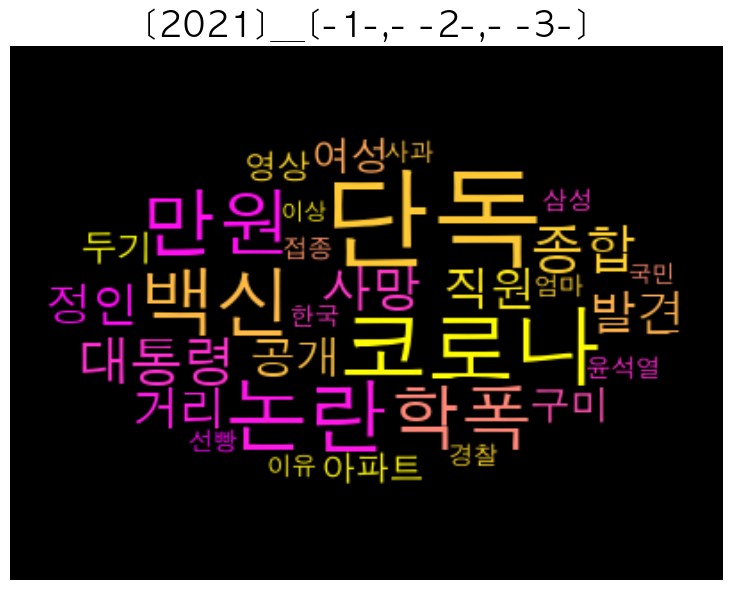

In [49]:
# 1

"""
word_counting
"""

wc = WordCloud(background_color="black",
               repeat=False,
               mask=mask, 
               min_font_size=10,
               prefer_horizontal=True,
               colormap = 'spring',
               font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf")


wc.generate_from_frequencies(tags)
plt.figure(figsize=(12,6),dpi=100)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"{''.join(str(show_year))}__{'-'.join(str(show_month))}",fontsize=25,fontweight='bold')
plt.tight_layout()
plt.show()